In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df_userorder = pd.read_csv('userorderdata.csv')
df_medistore = pd.read_csv('medistoredata.csv')
df_medistore

,Depression,Asthma,Cough,Heart Attack,Birth Control,Pain,Bipolar Disorders,Insomnia,Acne,Urinary Tract Infection,...,Migraine,Diabetic Peripheral Neuropathy,Menstrual disorde,Pneumonia,Anxiety,HIV Infection,Gout,Hepatitis C,ADHD,High Blood Pressure
0,Escitalopram,Prednisone,Dextromethorphan,Metoprolol,Cyclafem 1 / 35,Ultram,Lamotrigine,Ambien,Ziana,Bactrim,...,Imitrex,Qutenza,Yaz,Levofloxacin,Alprazolam,Genvoya,Zyloprim,Epclusa,Amphetamine,Ramipril
1,Zoloft,Advair HFA,Etonogestrel,Plavix,Copper,hydrocodone,Geodon,Trazodone,Isotretinoin,UTI-ROZ,...,Topiramate,Duloxetine,Lysteda,Avelox,Escitalopram,tenofovir alafenamide,Aleve,Harvoni,Clonidine,Atenolol
2,Effexor XR,Dulera,Mucinex DM,Aspirin,Levora,Cymbalta,Lithium,Desyrel,Ethinyl estradiol,methenamine,...,Sumatriptan,Nortriptyline,Junel Fe 1 / 20,Biaxin XL,Ativan,Triumeq,Febuxostat,Daclatasvir,Bupropion,Hydrochlorothiazide
3,Venlafaxine,Montelukast,Bromfed DM,Metformin,Blisovi Fe 1 / 20,Atorvastatin,Asenapine,Restoril,Benzoyl peroxide,Levaquin,...,Maxalt,Lyrica,Tranexamic acid,Clarithromycin,Lorazepam,Efavirenz,Colchicine,Ledipasvir,Vyvanse,Benicar
4,Bupropion,Singulair,Codeine,Bayer Aspirin,NuvaRing,Oxycodone,Lamictal,Diphenhydramine,Monodox,Nitrofurantoin,...,OnabotulinumtoxinA,Gabapentin,Topamax,Azithromycin,Lexapro,Intelence,Prednisone,Zepatier,Atomoxetine,Losartan
5,Desvenlafaxine,Albuterol,Hycodan,Clopidogrel,Ethinyl estradiol,Voltaren Gel,Aripiprazole,Suvorexant,Spironolactone,Macrobid,...,Eletriptan,Tapentadol,femhrt,Levaquin,Clonazepam,Atripla,Indomethacin,Telaprevir,Dexmethylphenidate,olmesartan
6,Mirtazapine,Breo Ellipta,Guaifenesin,Lisinopril,Etonogestrel,Amitriptyline,Quetiapine,Eszopiclone,Epiduo,Levofloxacin,...,Naratriptan,Cymbalta,Ethinyl estradiol,Rocephin,Effexor XR,Complera,Uloric,Interferon alfa-2b,Adderall,Adalat CC
7,Sertraline,Beclomethasone,Lortab,Metoprolol Tartrate,Ortho Tri-Cyclen Lo,Hydromorphone,Seroquel,Belsomra,trimethoprim,Trimethoprim,...,Topamax,Topiramate,Microgestin Fe 1.5 / 30,Biaxin,Pregabalin,Stribild,Allopurinol,Intron A,Aptensio XR,Nebivolol
8,Pristiq,Fluticasone,Benzonatate,Nitroglycerin,norethindrone,Tylox,Ziprasidone,Quetiapine,Acanya,Ciprofloxacin,...,Nadolol,Pregabalin,Gianvi,Moxifloxacin,BuSpar,tenofovir,Naproxen,Pegasys,etonogestrel,Tenex
9,Vilazodone,Levalbuterol,Tessalon Perles,Altace,ParaGard,Levo-Dromoran,Divalproex sodium,Zolpidem,Doxycycline,Rocephin,...,Almotriptan,Capsaicin,Loestrin 24 Fe,Ceftriaxone,Zoloft,lamivudine,Methylprednisolone,Sovaldi,Lisdexamfetamine,Lisinopril


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_49, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_50, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_51, *['index', 'count()', None], **{})
chart

In [30]:
df_userorder

,UserName,User ID,Date,Order
0,Renee Glass,163740,28-Feb-12,"Mirtazapine,Levofloxacin,Avelox,Escitalopram"
1,Heather Lyons,206473,17-May-09,"Monodox,Ziana,Isotretinoin,Macrobid"
2,Amanda Vang,159672,29-Sep-17,"OnabotulinumtoxinA,Amitriptyline,Cymbalta,Bactrim"
3,Jennifer Schmidt,39293,5-Mar-17,"Epiduo,Ethinyl estradiol,ParaGard,Ethinyl estr..."
4,Sydney Holloway,97768,22-Oct-15,"Cyclafem 1 / 35,Ultram,Aripiprazole,Hydrocodone"
5,Emily Watson,208087,3-Jul-14,"Copper,Ethinyl estradiol,NuvaRing,Blisovi Fe 1..."
6,Christopher Cross,215892,6-Jun-16,"Lamotrigine,Etonogestrel,Dextromethorphan,Copper"
7,Lori Cain,169852,21-Apr-09,"Restoril,Bromfed DM,Mucinex DM,Amitriptyline"
8,Michael Berry,23295,18-Oct-16,"Biaxin XL,Geodon,Lamotrigine,Quetiapine"
9,Jesus Mcpherson,71428,16-Apr-11,"Nicoderm CQ,Levo-Dromoran,Bactrim,Levora"


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_52, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_53, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_54, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_55, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_56, *[[['index', 'User ID']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_57, *['index', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_58, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_59, *['Purchase Date', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_60, *['Purchase Date', 'count()', None], **{})
chart

In [31]:
new_df_medistore = pd.DataFrame(columns=['Disease', 'Tag'])
for i in range(int(df_medistore.columns.shape[0])):
  new_df_medistore.loc[i,'Disease'] = df_medistore.columns[i]
  new_df_medistore.loc[i,'Tag'] = df_medistore[df_medistore.columns[i]].tolist()
new_df_medistore

,Disease,Tag
0,Depression,"[Escitalopram, Zoloft, Effexor XR, Venlafaxine..."
1,Asthma,"[Prednisone, Advair HFA, Dulera, Montelukast, ..."
2,Cough,"[Dextromethorphan, Etonogestrel, Mucinex DM, B..."
3,Heart Attack,"[Metoprolol, Plavix, Aspirin, Metformin, Bayer..."
4,Birth Control,"[Cyclafem 1 / 35, Copper, Levora, Blisovi Fe 1..."
5,Pain,"[Ultram, hydrocodone, Cymbalta, Atorvastatin, ..."
6,Bipolar Disorders,"[Lamotrigine, Geodon, Lithium, Asenapine, Lami..."
7,Insomnia,"[Ambien, Trazodone, Desyrel, Restoril, Diphenh..."
8,Acne,"[Ziana, Isotretinoin, Ethinyl estradiol, Benzo..."
9,Urinary Tract Infection,"[Bactrim, UTI-ROZ, methenamine, Levaquin, Nitr..."


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_61, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_62, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_63, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_64, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_65, *[[['index', 'ids']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_66, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_67, *['ids', 'count()', None], **{})
chart

In [32]:
new_df_medistore['Tag'] = new_df_medistore['Tag'].apply(lambda x:','.join(x))
new_df_medistore['Tag'] = new_df_medistore['Tag'].apply(lambda x:x.lower())
# new_df_medistore['Tag'] = new_df_medistore['Tag'].replace(" ", "")

In [33]:
new_df_medistore

,Disease,Tag
0,Depression,"escitalopram,zoloft,effexor xr,venlafaxine,bup..."
1,Asthma,"prednisone,advair hfa,dulera,montelukast,singu..."
2,Cough,"dextromethorphan,etonogestrel,mucinex dm,bromf..."
3,Heart Attack,"metoprolol,plavix,aspirin,metformin,bayer aspi..."
4,Birth Control,"cyclafem 1 / 35,copper,levora,blisovi fe 1 / 2..."
5,Pain,"ultram,hydrocodone,cymbalta,atorvastatin,oxyco..."
6,Bipolar Disorders,"lamotrigine,geodon,lithium,asenapine,lamictal,..."
7,Insomnia,"ambien,trazodone,desyrel,restoril,diphenhydram..."
8,Acne,"ziana,isotretinoin,ethinyl estradiol,benzoyl p..."
9,Urinary Tract Infection,"bactrim,uti-roz,methenamine,levaquin,nitrofura..."


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_68, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_69, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_70, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_71, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_72, *[[['index', 'ids']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_73, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_74, *['ids', 'count()', None], **{})
chart

In [34]:
new_df_userorder = df_userorder[['UserName','User ID','Order']]

In [35]:
new_df_userorder['Order'] = new_df_userorder['Order'].apply(lambda x:x.lower())
new_df_userorder

<ipython-input-35-67ce48e944a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder['Order'] = new_df_userorder['Order'].apply(lambda x:x.lower())


,UserName,User ID,Order
0,Renee Glass,163740,"mirtazapine,levofloxacin,avelox,escitalopram"
1,Heather Lyons,206473,"monodox,ziana,isotretinoin,macrobid"
2,Amanda Vang,159672,"onabotulinumtoxina,amitriptyline,cymbalta,bactrim"
3,Jennifer Schmidt,39293,"epiduo,ethinyl estradiol,paragard,ethinyl estr..."
4,Sydney Holloway,97768,"cyclafem 1 / 35,ultram,aripiprazole,hydrocodone"
5,Emily Watson,208087,"copper,ethinyl estradiol,nuvaring,blisovi fe 1..."
6,Christopher Cross,215892,"lamotrigine,etonogestrel,dextromethorphan,copper"
7,Lori Cain,169852,"restoril,bromfed dm,mucinex dm,amitriptyline"
8,Michael Berry,23295,"biaxin xl,geodon,lamotrigine,quetiapine"
9,Jesus Mcpherson,71428,"nicoderm cq,levo-dromoran,bactrim,levora"


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_75, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_76, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_77, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_78, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_79, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_80, *['ids'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_81, *[[['index', 'User ID'], ['User ID', 'ids']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_82, *['index', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_83, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_84, *['ids', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_85, *['ids', 'count()', None], **{})
chart

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(max_features=100)
vecs1=vec.fit_transform(new_df_userorder["Order"]).toarray()
vecs2=vec.transform(new_df_medistore["Tag"]).toarray()
print(vecs1.shape)
print(vecs2.shape)
print(vecs1)
print(vecs2)

(50, 100)
(21, 100)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
new_vec1=vecs1[:20]
new_vec2=vecs2[:20]
sim=cosine_similarity(vecs1,vecs2)

In [38]:
df_new_user=pd.DataFrame(df_userorder)
df_new_user['Flagged Disease'] = np.nan

In [39]:
#user_name="Michael Berry"
 #index = df_new_user.loc[df_new_user['UserName'] == user_name].index[0]
 #index

In [40]:
def recommend(User):
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]
  new_df_medistore["ids"]=[i for i in range(0,new_df_medistore.shape[0])]
 # index = df_new_user.loc[df_new_user['UserName'] == user_name1].index[0]
  user_name=new_df_userorder[new_df_userorder.UserName==User]["ids"].values[0]
  li=[]
  #user_name = User
  #index = df_new_user.loc[df_new_user['UserName'] == user_name].index[0]
 # sort=sorted(list(enumerate(sim[index])), reverse = True, key = lambda x : x[1])[0:6]
  li=sorted(list(enumerate(sim[user_name])), reverse = True, key = lambda x : x[1])[0:6]
  user_name1 = User
  index = df_new_user.loc[df_new_user['UserName'] == user_name1].index[0]
  index_to_replace = index
  sort=sorted(list(enumerate(sim[index])), reverse = True, key = lambda x : x[1])[0:6]
  s1=new_df_medistore.iloc[sort[0][0]]["Disease"]
  user_value = s1
 # replace all missing values at the specified index with the user-defined value
  df_new_user.iloc[index_to_replace] = df_new_user.iloc[index_to_replace].fillna(user_value)
  first=[]
  second=[]
  first_six=[]
  second_four=[]
  count=0
  str1=new_df_medistore.iloc[li[0][0]].Tag
  str2=new_df_medistore.iloc[li[1][0]].Tag
  first=list(str1.split(","))
  second=list(str2.split(","))
  for medicine in first:
    if count>5:
      break
    count+=1
    first_six.append(medicine)
  count=0
  for medicine1 in second:
    if count>3:
      break
    count+=1
    second_four.append(medicine1)
  first_six.extend(second_four)
  return(first_six)


In [41]:
m=recommend("Renee Glass")
m

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['escitalopram',
 'zoloft',
 'effexor xr',
 'venlafaxine',
 'bupropion',
 'desvenlafaxine',
 'bactrim',
 'uti-roz',
 'methenamine',
 'levaquin']

In [42]:
f=recommend("Heather Lyons")
f

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['ziana',
 'isotretinoin',
 'ethinyl estradiol',
 'benzoyl peroxide',
 'monodox',
 'spironolactone',
 'bactrim',
 'uti-roz',
 'methenamine',
 'levaquin']

In [43]:
e=recommend("Amanda Vang")
e

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['imitrex',
 'topiramate',
 'sumatriptan',
 'maxalt',
 'onabotulinumtoxina',
 'eletriptan',
 'bactrim',
 'uti-roz',
 'methenamine',
 'levaquin']

In [44]:
q=recommend("Jennifer Schmidt")
q

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['ziana',
 'isotretinoin',
 'ethinyl estradiol',
 'benzoyl peroxide',
 'monodox',
 'spironolactone',
 'cyclafem 1 / 35',
 'copper',
 'levora',
 'blisovi fe 1 / 20']

In [45]:
w=recommend("Sydney Holloway")
w

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['ultram',
 'hydrocodone',
 'cymbalta',
 'atorvastatin',
 'oxycodone',
 'voltaren gel',
 'lamotrigine',
 'geodon',
 'lithium',
 'asenapine']

In [46]:
r=recommend("Emily Watson")
r

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['cyclafem 1 / 35',
 'copper',
 'levora',
 'blisovi fe 1 / 20',
 'nuvaring',
 'ethinyl estradiol',
 'yaz',
 'lysteda',
 'junel fe 1 / 20',
 'tranexamic acid']

In [47]:
t=recommend("Christopher Cross")
t

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['cyclafem 1 / 35',
 'copper',
 'levora',
 'blisovi fe 1 / 20',
 'nuvaring',
 'ethinyl estradiol',
 'amphetamine',
 'clonidine',
 'bupropion',
 'vyvanse']

In [48]:
y=recommend("Lori Cain")
y

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['dextromethorphan',
 'etonogestrel',
 'mucinex dm',
 'bromfed dm',
 'codeine',
 'hycodan',
 'ambien',
 'trazodone',
 'desyrel',
 'restoril']

In [49]:
u=recommend("Michael Berry")
u

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['lamotrigine',
 'geodon',
 'lithium',
 'asenapine',
 'lamictal',
 'aripiprazole',
 'levofloxacin',
 'avelox',
 'biaxin xl',
 'clarithromycin']

In [50]:
i=recommend("Jesus Mcpherson")
i

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


['ultram',
 'hydrocodone',
 'cymbalta',
 'atorvastatin',
 'oxycodone',
 'voltaren gel',
 'varenicline',
 'chantix',
 'zyban',
 'nicotrol inhaler']

In [51]:
user_name = new_df_userorder['UserName'].tolist()
for i in user_name:
  recommend(i)

<ipython-input-40-419b6016b2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_userorder["ids"]=[i for i in range(0,new_df_userorder.shape[0])]


In [52]:
df_new_user.columns=['User Name','User ID','Purchase Date','Ordered Medicines','Flagged Disease']
df_new_user[:]

,User Name,User ID,Purchase Date,Ordered Medicines,Flagged Disease
0,Renee Glass,163740,28-Feb-12,"Mirtazapine,Levofloxacin,Avelox,Escitalopram",Depression
1,Heather Lyons,206473,17-May-09,"Monodox,Ziana,Isotretinoin,Macrobid",Acne
2,Amanda Vang,159672,29-Sep-17,"OnabotulinumtoxinA,Amitriptyline,Cymbalta,Bactrim",Migraine
3,Jennifer Schmidt,39293,5-Mar-17,"Epiduo,Ethinyl estradiol,ParaGard,Ethinyl estr...",Acne
4,Sydney Holloway,97768,22-Oct-15,"Cyclafem 1 / 35,Ultram,Aripiprazole,Hydrocodone",Pain
5,Emily Watson,208087,3-Jul-14,"Copper,Ethinyl estradiol,NuvaRing,Blisovi Fe 1...",Birth Control
6,Christopher Cross,215892,6-Jun-16,"Lamotrigine,Etonogestrel,Dextromethorphan,Copper",Birth Control
7,Lori Cain,169852,21-Apr-09,"Restoril,Bromfed DM,Mucinex DM,Amitriptyline",Cough
8,Michael Berry,23295,18-Oct-16,"Biaxin XL,Geodon,Lamotrigine,Quetiapine",Bipolar Disorders
9,Jesus Mcpherson,71428,16-Apr-11,"Nicoderm CQ,Levo-Dromoran,Bactrim,Levora",Pain


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_86, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_87, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_88, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_89, *['User ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_90, *[[['index', 'User ID']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_91, *['index', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_92, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_93, *['Purchase Date', 'User ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_94, *['Purchase Date', 'count()', None], **{})
chart

In [53]:
dff=df_new_user.to_csv("stt")

<ipython-input-54-79f6e2d36627>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([list1[i] for i in range(0,sim.shape[1])])
<ipython-input-54-79f6e2d36627>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([list2[i] for i in range(0,sim.shape[1])])


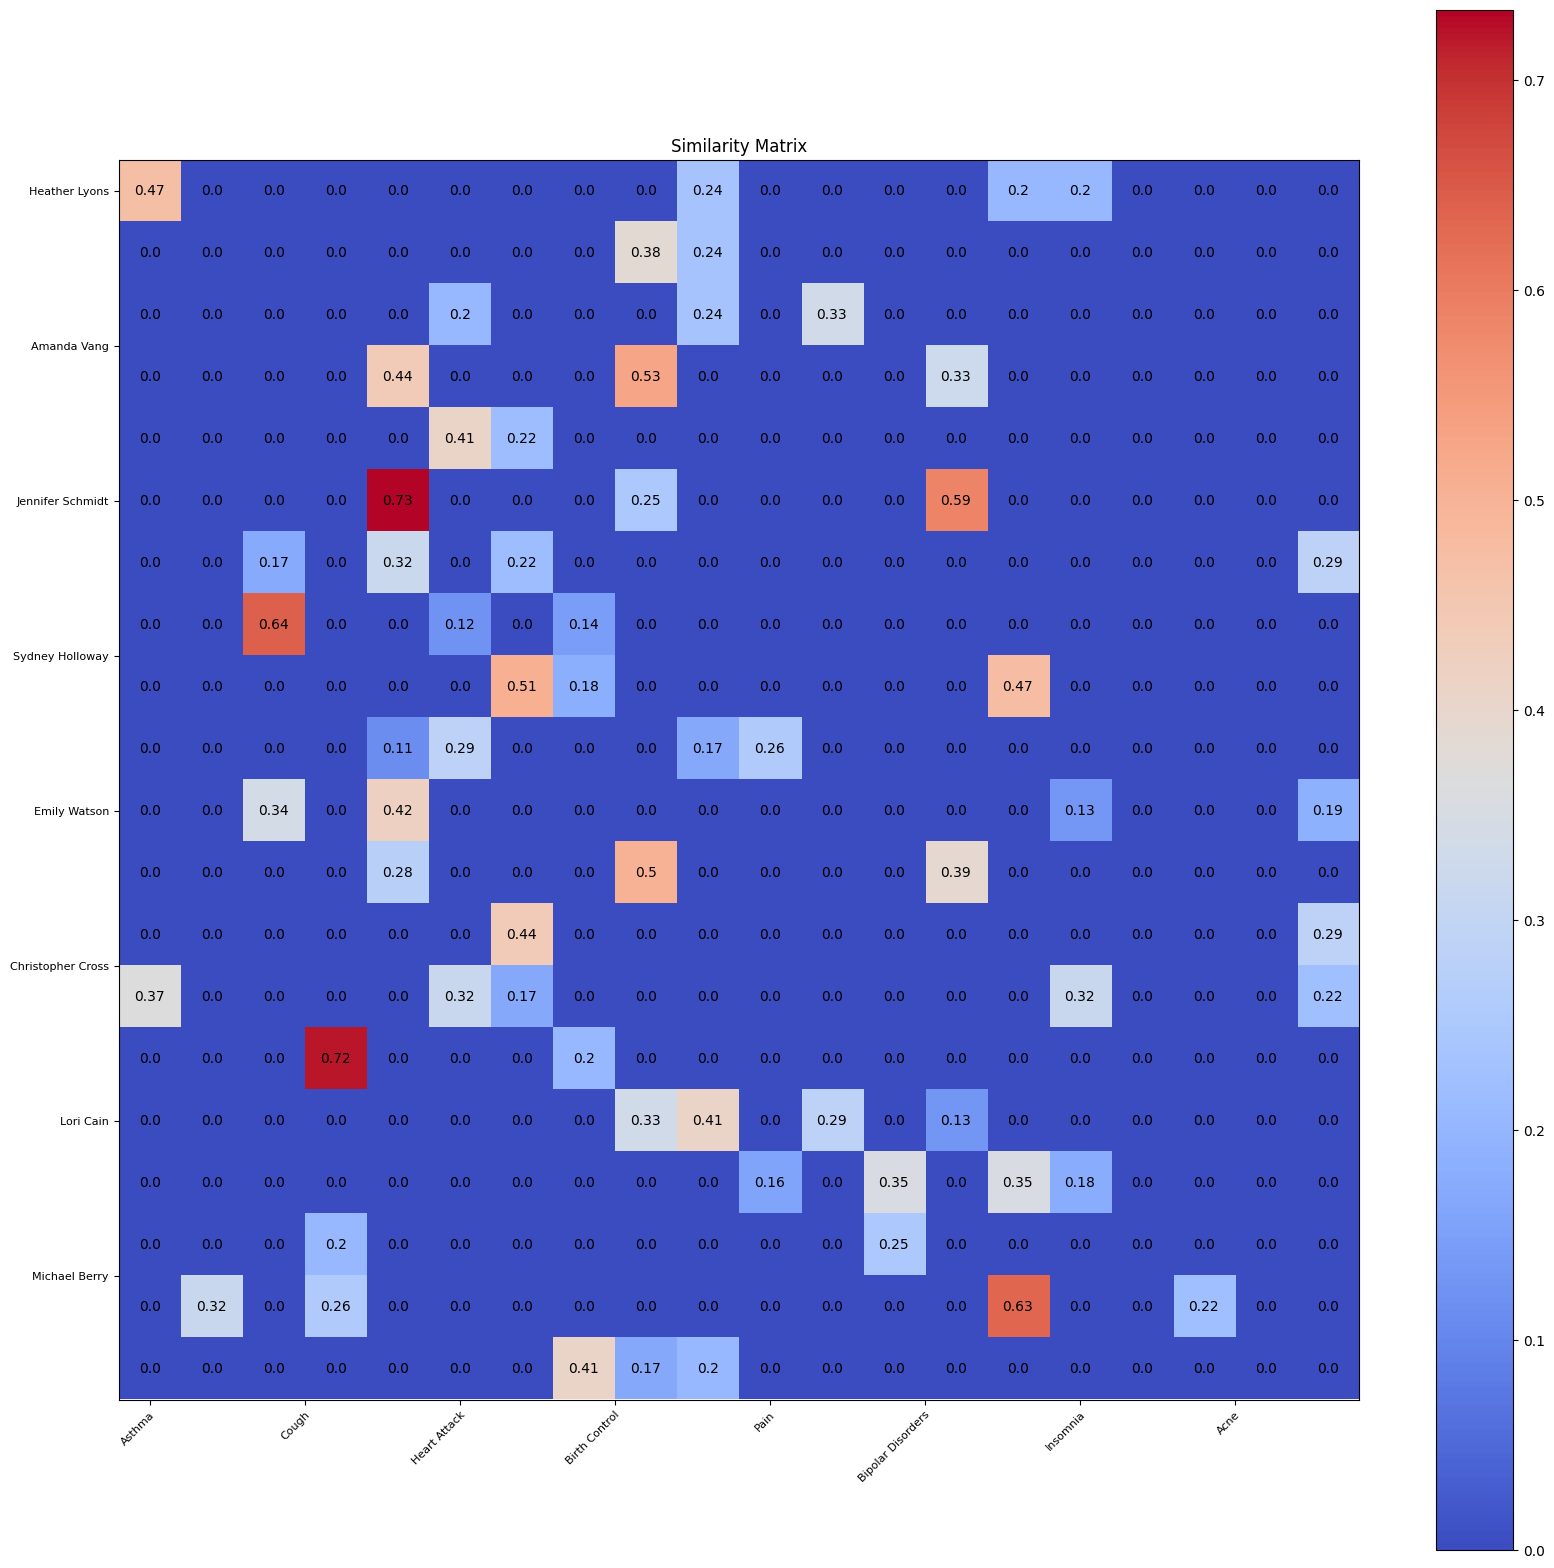

In [54]:
import numpy as np
import matplotlib.pyplot as plt
new_med=df_userorder[:20]
new_ord=df_medistore[:20]
# Create a random similarity matrix
sim = cosine_similarity(new_vec1,new_vec2)

# Set the figure size and colormap
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(sim, cmap='coolwarm')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
list1=new_df_medistore['Disease'].tolist()
list2=new_df_userorder['UserName'].tolist()
# Set the axis labels and title
list1=list1[0:sim.shape[1]]
list2=list2[0:sim.shape[0]]
[list1[i] for i in range(0,sim.shape[1])]
[list2[i] for i in range(0,sim.shape[1])]
ax.set_xticklabels([list1[i] for i in range(0,sim.shape[1])])
ax.set_yticklabels([list2[i] for i in range(0,sim.shape[1])])
ax.set_title('Similarity Matrix')

# Rotate the tick labels and set the tick label font size
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=8)

# Loop over data dimensions and create text annotations
for i in range(sim.shape[0]):
    for j in range(sim.shape[1]):
        text = ax.text(j, i, round(sim[i, j], 2),
                       ha="center", va="center", color="black")

# Show the plot
plt.show()
